In [28]:
import numpy as np 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

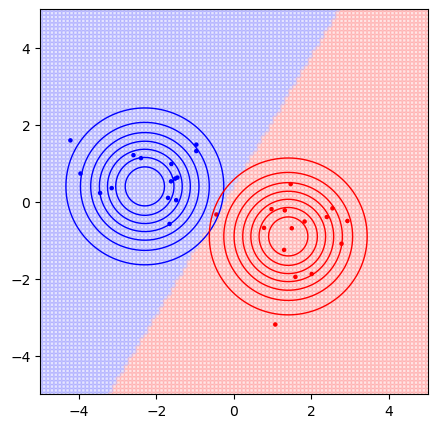

In [76]:

mean1 = [-2.3, 0.4]
mean2 = [1.4, -0.9]
cov = [[1, 0], [0, 1]]

t = np.linspace(-5, 5, 1000) 
h = np.linspace(-5, 5, 1000)
w_0, w_1 = np.meshgrid(t, h)
z1 = stats.multivariate_normal(mean1, cov).pdf(np.dstack((w_0, w_1)))
z2 = stats.multivariate_normal(mean2, cov).pdf(np.dstack((w_0, w_1)))


X = np.concatenate((np.random.multivariate_normal(mean1, cov, 15), np.random.multivariate_normal(mean2, cov, 15)), axis=0)
y = np.array(["blue"] * 15 + ["red"] * 15)
# plt.scatter(-2.3, 0.4, c="b")

model = LinearDiscriminantAnalysis().fit(X, y) 
x_vals = np.linspace(-5, 5, 100) 
y_vals = np.linspace(-5, 5, 100) 
xx, yy = np.meshgrid(x_vals, y_vals)
coords = np.stack((xx.ravel(), yy.ravel()), axis=1)


plt.figure(figsize=(5, 5))
plt.scatter(*zip(*X), c=y, s=5)
plt.contour(t, h, z1, colors="blue", linewidths=1)
plt.contour(t, h, z2, colors="red", linewidths=1)
plt.scatter(xx, yy, c=model.predict(coords), s=10, alpha=0.1)
plt.savefig("GDA.png")
plt.show()